<a href="https://colab.research.google.com/github/okbajiya/SMP-Project-2023/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Google_test_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [4]:
data.shape

(252, 7)

In [5]:
data.drop('Adj Close', axis= 1, inplace= True)

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1389600


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.9+ KB


In [8]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.9+ KB


In [11]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.9+ KB


In [13]:
data.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1131.925615,1143.037319,1120.368111,1131.963092,1.613059e+06
std,64.187732,61.947013,66.312745,64.872818,7.319624e+05
min,973.900024,1003.539978,970.109985,976.219971,6.915000e+05
25%,1079.867493,1092.682464,1068.087525,1079.680023,1.202525e+06
50%,1130.579956,1141.875000,1119.025024,1132.075012,1.436500e+06
75%,1185.037506,1193.165039,1171.849976,1184.837524,1.837200e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,6.207000e+06


In [14]:
print(len(data))

252


<Axes: >

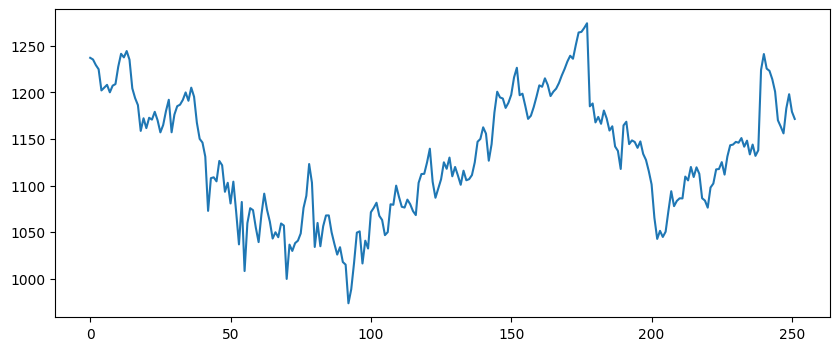

In [15]:
data['Open'].plot(figsize=(10,4))

In [16]:
x = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [18]:
x_train.shape

(189, 4)

In [19]:
x_test.shape

(63, 4)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
print(regressor.coef_)

[-6.13598198e-01  7.61706627e-01  8.55502609e-01 -2.21087672e-07]


In [23]:
print(regressor.intercept_)

-2.3454284087349606


In [24]:
predicted = regressor.predict(x_test)

In [25]:
print(x_test)

            Open         High          Low   Volume
158  1184.099976  1196.660034  1182.000000  1252500
83   1056.489990  1060.599976  1039.839966  1394700
170  1233.000000  1240.560059  1227.819946  1221900
101  1076.109985  1084.560059  1060.530029  1764900
150  1197.349976  1227.140015  1196.170044  2227400
..           ...          ...          ...      ...
221  1098.000000  1107.579956  1093.703003  1436300
15   1204.270020  1212.989990  1192.500000  1831000
152  1226.319946  1230.000000  1202.824951  1714200
74   1041.000000  1057.579956  1038.489990  1803200
7    1200.000000  1211.839966  1199.000000   887400

[63 rows x 4 columns]


In [26]:
predicted.shape

(63,)

In [27]:
dframe = pd.DataFrame(y_test, predicted)

In [28]:
dfr = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted})

In [29]:
print(dfr)

     Actual Price  Predicted Price
158   1194.430054      1193.524009
83    1051.750000      1046.537700
170   1236.339966      1236.163831
101   1076.280029      1070.368017
150   1223.969971      1220.517607
..            ...              ...
221   1097.949951      1102.922966
15    1197.000000      1202.441220
152   1205.500000      1210.726908
74    1044.410034      1052.496738
7     1207.329956      1209.954701

[63 rows x 2 columns]


In [30]:
dfr.head(10)

,Actual Price,Predicted Price
158,1194.430054,1193.524009
83,1051.750000,1046.537700
170,1236.339966,1236.163831
101,1076.280029,1070.368017
150,1223.969971,1220.517607
199,1117.949951,1119.867885
118,1110.750000,1116.920892
227,1140.479980,1140.727481
63,1066.150024,1058.558848
135,1116.050049,1111.699106


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
regressor.score(x_test,y_test)

0.9939724463169349

In [33]:
import math

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 4.28023988053871


In [35]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 25.851774031910416


In [36]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 5.084463986686346


In [37]:
graph = dfr.head(10)

<Axes: >

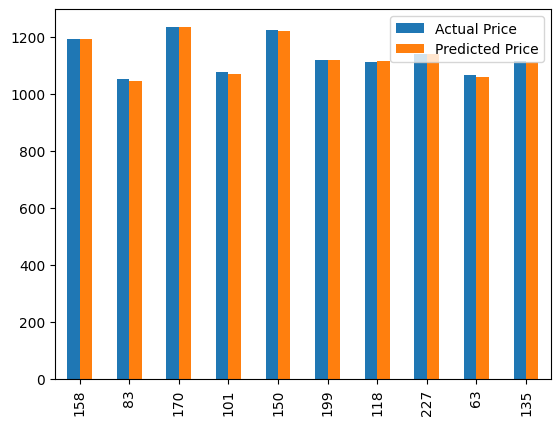

In [38]:
graph.plot(kind= 'bar')